<a href="https://colab.research.google.com/github/BMSaumya/Inspiher/blob/main/saumya_taskset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[10, 12, 5, 10, 9, 13, 18, 6, 0, 14, 15, 7, 15, 10, 14, 8, 8, 11, 15, 0, 14, 16, 16, 6, 0, 19, 11, 12, 17, 10, 8, 10, 15, 13, 8, 5, 0, 15, 14, 8, 5, 11, 14, 9, 15, 10, 11, 13, 13, 16, 13, 15, 12, 10, 6, 12, 11, 0, 16, 17, 14, 10, 10, 6, 9, 17, 8, 10, 9, 15, 6, 10, 15, 19, 12, 6, 9, 15, 5]
[ 7.92585101 12.74724823  2.70267069  8.57451679  8.57451679 12.74724823
 19.57756096  6.31871861  3.90802    12.74724823 15.15794685  5.9169355
 13.95259754 10.73833273 14.75616374  8.32763412  6.72050171 10.73833273
 15.96151305  5.1133693  14.35438064 15.96151305 15.55972995  4.55668577
  3.90802    19.97934407 10.73833273  9.53298342 17.56864546 10.33654962
  7.52406791  7.92585101 15.55972995 12.74724823  6.31871861  3.90802
 -0.66649455 15.15794685 12.74724823  6.72050171  5.1133693   9.53298342
 14.35438064  8.32763412 16.36329615  9.93476652 11.3869985  14.35438064
 11.94368203 16.76507925 13.55081444 15.40482952 10.33654962  8.32763412
  4.3098031  11.54189893 10.73833273  2.70267069 15.96151

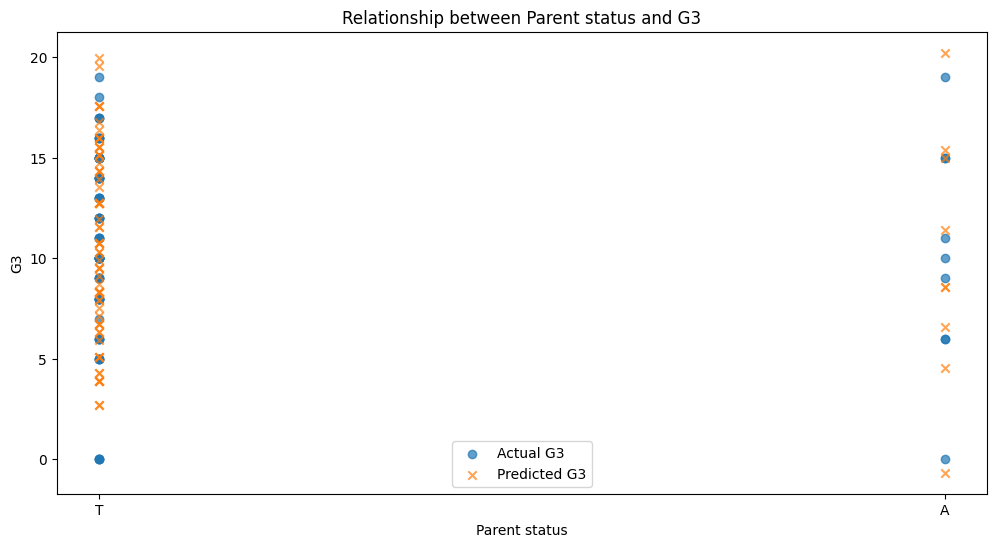

Mean Squared Error: 1.8888006990803552


In [29]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('student-mat.csv')

# Select relevant columns for analysis
data = df[['Pstatus', 'G1', 'G2', 'G3']]

# Calculate the mean of G1, G2, and G3 for each row using .loc
data = data.assign(mean_G=data[['G1', 'G2', 'G3']].mean(axis=1))

# One-hot encode 'Pstatus'
data = pd.get_dummies(data, columns=['Pstatus'], drop_first=True)

# Split the data into features (X) and target variable (y)
X = data[['mean_G', 'Pstatus_T']]
y = data['G3']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

print(y_test.values.tolist())
print(y_pred)

# Create a DataFrame with the original 'Pstatus' and mean_G columns and predicted/actual G3 values
plot_data = pd.DataFrame({'Parent status': df.loc[X_test.index, 'Pstatus'], 'Mean G': X_test['mean_G'], 'Actual G3': y_test.values, 'Predicted G3': y_pred})

# Plot the relationship between 'Pstatus' and G3
plt.figure(figsize=(12, 6))
plt.scatter(plot_data['Parent status'], plot_data['Actual G3'], label='Actual G3', alpha=0.7)
plt.scatter(plot_data['Parent status'], plot_data['Predicted G3'], label='Predicted G3', marker='x', alpha=0.7)
plt.xlabel('Parent status')
plt.ylabel('G3')
plt.title('Relationship between Parent status and G3')
plt.legend()
plt.show()

from sklearn.metrics import mean_squared_error
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')


[10, 12, 5, 10, 9, 13, 18, 6, 0, 14, 15, 7, 15, 10, 14, 8, 8, 11, 15, 0, 14, 16, 16, 6, 0, 19, 11, 12, 17, 10, 8, 10, 15, 13, 8, 5, 0, 15, 14, 8, 5, 11, 14, 9, 15, 10, 11, 13, 13, 16, 13, 15, 12, 10, 6, 12, 11, 0, 16, 17, 14, 10, 10, 6, 9, 17, 8, 10, 9, 15, 6, 10, 15, 19, 12, 6, 9, 15, 5]
[ 7.9206744  12.57494488  2.56558928  8.47126884  7.87038799 12.57494488
 19.83196733  6.46939772  3.76671195 13.02560552 15.42785087  5.91880328
 13.92628777 10.57307376 14.57681601  8.62148905  6.86977194 10.57307376
 15.92815889  4.96783462 14.47688221 15.92815889 15.67800488  4.16708617
  4.21737258 20.23234156 10.87351419  9.82261173 17.679876   10.62336017
  7.21985976  7.77045419 15.52778467 12.7251651   6.46939772  3.76671195
 -0.73733832 15.42785087 12.87538531  6.86977194  5.41849526  9.82261173
 14.32666199  8.47126884 16.47875333 10.07276574 11.27388841 14.02622157
 12.22485707 16.72890734 13.82635397 15.42785087 10.62336017  8.17082842
  4.16708617 11.52404242 10.72329397  2.8660297  16.0

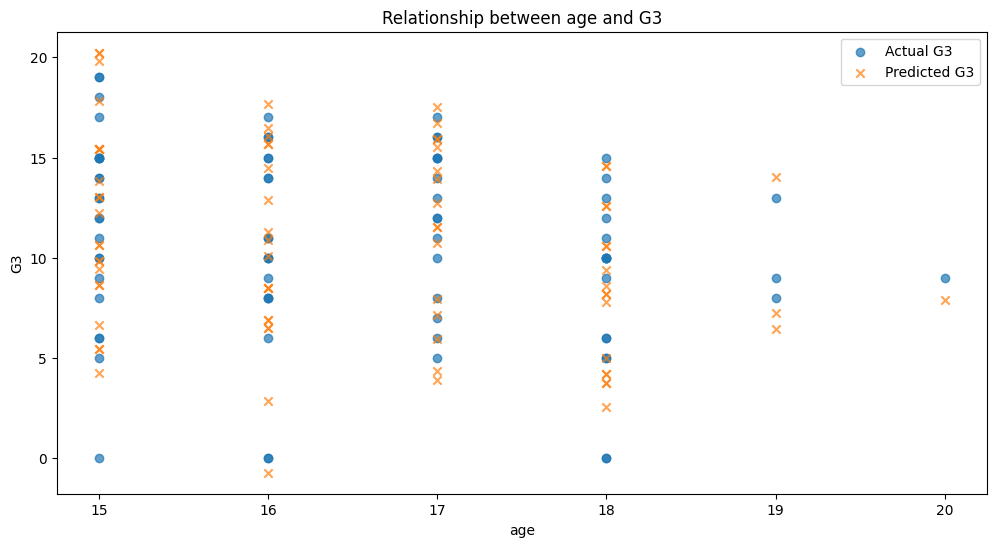

Mean Squared Error: 1.937874505913573


In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('student-mat.csv')

# Select relevant columns for analysis
data = df[['age', 'G1', 'G2', 'G3']]

# Calculate the mean of G1, G2, and G3 for each row using .loc
data = data.assign(mean_G=data[['G1', 'G2', 'G3']].mean(axis=1))

# Split the data into features (X) and target variable (y)
X = data[['mean_G', 'age']]
y = data['G3']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

print(y_test.values.tolist())
print(y_pred)

# Create a DataFrame with the original 'traveltime' column and predicted/actual 'G3' values
plot_data = pd.DataFrame({'age': df.loc[X_test.index, 'age'], 'Actual G3': y_test.values, 'Predicted G3': y_pred})

# Plot the relationship between 'traveltime' and G3
plt.figure(figsize=(12, 6))
plt.scatter(plot_data['age'], plot_data['Actual G3'], label='Actual G3', alpha=0.7)
plt.scatter(plot_data['age'], plot_data['Predicted G3'], label='Predicted G3', marker='x', alpha=0.7)
plt.xlabel('age')
plt.ylabel('G3')
plt.title('Relationship between age and G3')
plt.legend()
plt.show()


from sklearn.metrics import mean_squared_error
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

[10, 12, 5, 10, 9, 13, 18, 6, 0, 14, 15, 7, 15, 10, 14, 8, 8, 11, 15, 0, 14, 16, 16, 6, 0, 19, 11, 12, 17, 10, 8, 10, 15, 13, 8, 5, 0, 15, 14, 8, 5, 11, 14, 9, 15, 10, 11, 13, 13, 16, 13, 15, 12, 10, 6, 12, 11, 0, 16, 17, 14, 10, 10, 6, 9, 17, 8, 10, 9, 15, 6, 10, 15, 19, 12, 6, 9, 15, 5]
[ 7.94854527 12.77715506  2.71763601  8.35084475  8.35084475 12.77613899
 19.61319794  6.34036344  3.92555051 12.77410685 15.18891978  5.93501575
 13.98202135 10.76362554 14.78763637  8.35084475  6.74164685 10.76565768
 15.99656694  5.13244894 14.38330475 15.99351873 15.59020318  4.32581785
  3.92351837 20.01549742 10.76464161  9.55672711 17.60170056 10.36030999
  7.54421366  7.94956134 15.59020318 12.77410685  6.3383313   3.92351837
 -0.90305927 15.18790371 12.77512292  6.74164685  5.13346501  9.55875925
 14.38330475  8.35084475 16.39683427  9.95801052 11.16592501 14.38432082
 11.9695079  16.79710161 13.58073794 15.18790371 10.36030999  8.34881261
  4.32581785 11.56924056 10.76565768  2.71865208 15.9

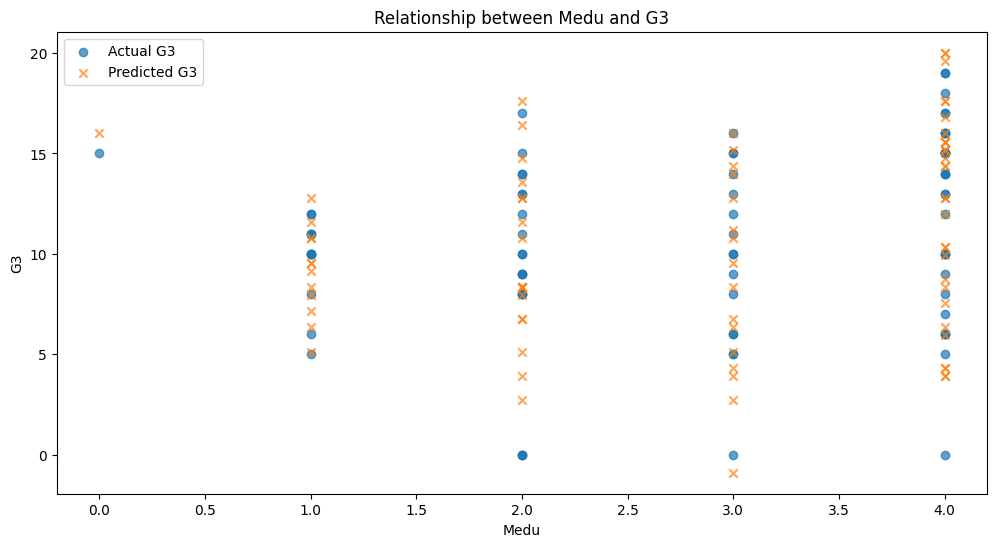

Mean Squared Error: 1.8976517101980122


In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('student-mat.csv')

# Select relevant columns for analysis
data = df[['Medu', 'G1', 'G2', 'G3']]

# Calculate the mean of G1, G2, and G3 for each row using .loc
data = data.assign(mean_G=data[['G1', 'G2', 'G3']].mean(axis=1))

# Split the data into features (X) and target variable (y)
X = data[['mean_G', 'Medu']]
y = data['G3']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

print(y_test.values.tolist())
print(y_pred)

# Create a DataFrame with the original 'traveltime' column and predicted/actual 'G3' values
plot_data = pd.DataFrame({'Medu': df.loc[X_test.index, 'Medu'], 'Actual G3': y_test.values, 'Predicted G3': y_pred})

# Plot the relationship between 'traveltime' and G3
plt.figure(figsize=(12, 6))
plt.scatter(plot_data['Medu'], plot_data['Actual G3'], label='Actual G3', alpha=0.7)
plt.scatter(plot_data['Medu'], plot_data['Predicted G3'], label='Predicted G3', marker='x', alpha=0.7)
plt.xlabel('Medu')
plt.ylabel('G3')
plt.title('Relationship between Medu and G3')
plt.legend()
plt.show()


from sklearn.metrics import mean_squared_error
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

[10, 12, 5, 10, 9, 13, 18, 6, 0, 14, 15, 7, 15, 10, 14, 8, 8, 11, 15, 0, 14, 16, 16, 6, 0, 19, 11, 12, 17, 10, 8, 10, 15, 13, 8, 5, 0, 15, 14, 8, 5, 11, 14, 9, 15, 10, 11, 13, 13, 16, 13, 15, 12, 10, 6, 12, 11, 0, 16, 17, 14, 10, 10, 6, 9, 17, 8, 10, 9, 15, 6, 10, 15, 19, 12, 6, 9, 15, 5]
[ 8.07692051 12.83228519  2.65103521  8.48061279  8.39167002 12.83228519
 19.51716854  6.46215135  4.03999762 12.65439964 15.07655337  5.88057351
 14.13230483 10.81382375 14.93968941  8.30272724  6.77690087 10.90276652
 16.0618235   5.16213171 14.26916879 16.15076627 15.65813121  4.17686159
  3.86211207 20.09874638 10.81382375  9.51380411 17.4987071  10.58801701
  7.40639989  8.07692051 15.56918843 12.65439964  6.2842658   3.95105485
 -0.98219539 15.07655337 12.92122797  6.77690087  5.25107449  9.69168966
 14.26916879  8.39167002 16.46551578 10.00643917 11.12857326 14.35811157
 11.84701506 16.69132252 13.63966977 15.16549614 10.23224591  8.21378447
  4.17686159 11.62120833 10.90276652  2.73997798 16.0

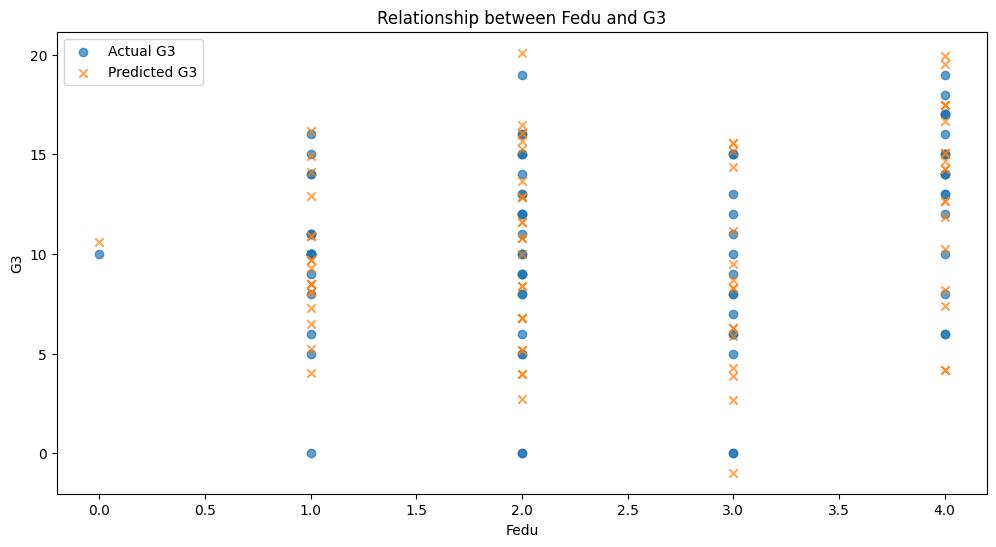

Mean Squared Error: 1.9046214399880244


In [26]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('student-mat.csv')

# Select relevant columns for analysis
data = df[['Fedu', 'G1', 'G2', 'G3']]

# Calculate the mean of G1, G2, and G3 for each row using .loc
data = data.assign(mean_G=data[['G1', 'G2', 'G3']].mean(axis=1))

# Split the data into features (X) and target variable (y)
X = data[['mean_G', 'Fedu']]
y = data['G3']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

print(y_test.values.tolist())
print(y_pred)

# Create a DataFrame with the original 'traveltime' column and predicted/actual 'G3' values
plot_data = pd.DataFrame({'Fedu': df.loc[X_test.index, 'Fedu'], 'Actual G3': y_test.values, 'Predicted G3': y_pred})

# Plot the relationship between 'traveltime' and G3
plt.figure(figsize=(12, 6))
plt.scatter(plot_data['Fedu'], plot_data['Actual G3'], label='Actual G3', alpha=0.7)
plt.scatter(plot_data['Fedu'], plot_data['Predicted G3'], label='Predicted G3', marker='x', alpha=0.7)
plt.xlabel('Fedu')
plt.ylabel('G3')
plt.title('Relationship between Fedu and G3')
plt.legend()
plt.show()


from sklearn.metrics import mean_squared_error
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

[10, 12, 5, 10, 9, 13, 18, 6, 0, 14, 15, 7, 15, 10, 14, 8, 8, 11, 15, 0, 14, 16, 16, 6, 0, 19, 11, 12, 17, 10, 8, 10, 15, 13, 8, 5, 0, 15, 14, 8, 5, 11, 14, 9, 15, 10, 11, 13, 13, 16, 13, 15, 12, 10, 6, 12, 11, 0, 16, 17, 14, 10, 10, 6, 9, 17, 8, 10, 9, 15, 6, 10, 15, 19, 12, 6, 9, 15, 5]
[ 8.01733937 12.76362848  2.77469462  8.42061974  8.33933394 12.85670377
 19.63118419  6.40421791  3.90324991 12.85670377 15.27638596  5.9095173
 13.98525906 10.75901613 14.8731056   8.32754445  6.80749828 10.84030194
 15.98987141  5.10130152 14.16576493 16.00166089 15.37560603  4.29474079
  3.89311547 20.02433011 10.84030194  9.63046084 17.61478236 10.34560133
  7.52263877  8.01733937 15.37560603 12.76528352  6.40421791  3.98453571
 -0.85482868 15.18496572 12.85670377  6.72621247  5.19437681  9.63046084
 14.37840499  8.33933394 16.39315177  9.94232096 11.2435823  14.46982523
 12.05014303 16.80822162 13.57018921 15.19510016 10.13296127  8.3291995
  4.29639584 11.64686267 10.84030194  2.77469462 15.991

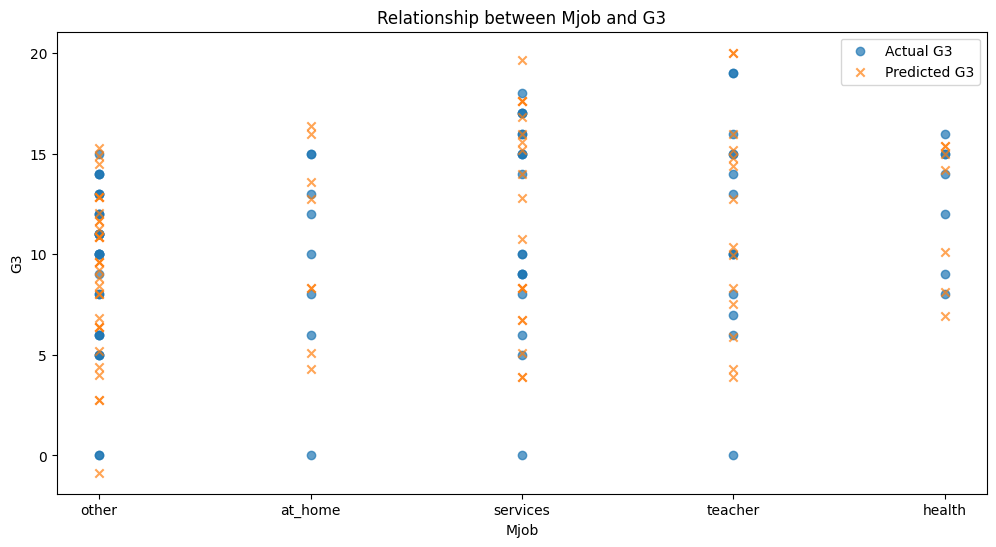

Mean Squared Error: 1.8851848474878026


In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('student-mat.csv')

# Select relevant columns for analysis
data = df[['Mjob', 'G1', 'G2', 'G3']]

# Calculate the mean of G1, G2, and G3 for each row using .loc
data = data.assign(mean_G=data[['G1', 'G2', 'G3']].mean(axis=1))

# One-hot encode 'Mjob'
# data = pd.get_dummies(data, columns=['Mjob'], drop_first=True)
data = pd.get_dummies(data, columns=['Mjob'], drop_first=True)

# Split the data into features (X) and target variable (y)
X = data[['mean_G', 'Mjob_services', 'Mjob_other', 'Mjob_health', 'Mjob_teacher']]
y = data['G3']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

print(y_test.values.tolist())
print(y_pred)

# Create a DataFrame with the original 'Mjob' and mean_G columns and predicted/actual G3 values
plot_data = pd.DataFrame({'Mjob': df.loc[X_test.index, 'Mjob'], 'Mean G': X_test['mean_G'], 'Actual G3': y_test.values, 'Predicted G3': y_pred})

# Plot the relationship between 'Mjob' and G3
plt.figure(figsize=(12, 6))
plt.scatter(plot_data['Mjob'], plot_data['Actual G3'], label='Actual G3', alpha=0.7)
plt.scatter(plot_data['Mjob'], plot_data['Predicted G3'], label='Predicted G3', marker='x', alpha=0.7)
plt.xlabel('Mjob')
plt.ylabel('G3')
plt.title('Relationship between Mjob and G3')
plt.legend()
plt.show()


from sklearn.metrics import mean_squared_error
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

[10, 12, 5, 10, 9, 13, 18, 6, 0, 14, 15, 7, 15, 10, 14, 8, 8, 11, 15, 0, 14, 16, 16, 6, 0, 19, 11, 12, 17, 10, 8, 10, 15, 13, 8, 5, 0, 15, 14, 8, 5, 11, 14, 9, 15, 10, 11, 13, 13, 16, 13, 15, 12, 10, 6, 12, 11, 0, 16, 17, 14, 10, 10, 6, 9, 17, 8, 10, 9, 15, 6, 10, 15, 19, 12, 6, 9, 15, 5]
[ 8.1231933  12.5592927   2.48012794  8.52635989  8.12446021 12.96119238
 19.2084508   6.51052694  4.0915274  12.35461876 15.38019193  6.10736035
 13.76879247 10.94535943 14.97702534  8.12446021  6.91369353 10.94535943
 15.53146194  5.30102717 14.57385874 15.78462542 15.38145883  3.88812037
  3.68962771 20.21819101 10.94535943  9.73585966 17.19261785 10.54219284
  7.31812703  8.1231933  15.38145883 12.5592927   6.51052694  4.0915274
 -0.74647169 15.43285337 12.96119238  6.51179385  5.30102717  9.33395998
 13.96728513  8.12446021 16.5896917   9.73712657 10.94662634 14.57385874
 12.1548592  16.38628467 13.76752556 14.97829224 10.14029316  8.12446021
  3.83963082 11.75169261 10.94535943  2.88202763 16.18

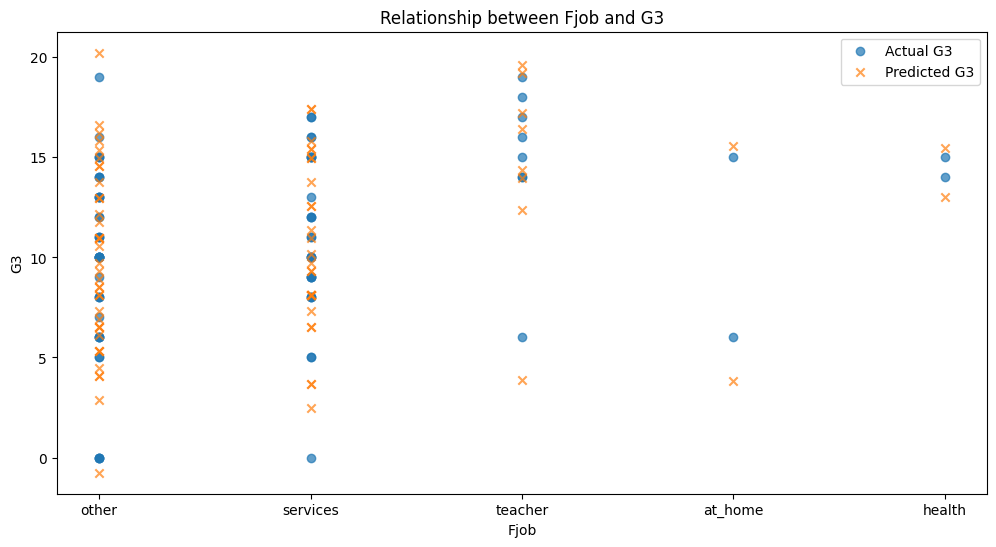

Mean Squared Error: 1.9925770189519019


In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('student-mat.csv')

# Select relevant columns for analysis
data = df[['Fjob', 'G1', 'G2', 'G3']]

# Calculate the mean of G1, G2, and G3 for each row using .loc
data = data.assign(mean_G=data[['G1', 'G2', 'G3']].mean(axis=1))

# One-hot encode 'Fjob'
# data = pd.get_dummies(data, columns=['Fjob'], drop_first=True)
data = pd.get_dummies(data, columns=['Fjob'], drop_first=True)

# Split the data into features (X) and target variable (y)
X = data[['mean_G', 'Fjob_services', 'Fjob_other', 'Fjob_health', 'Fjob_teacher']]
y = data['G3']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

print(y_test.values.tolist())
print(y_pred)

# Create a DataFrame with the original 'Fjob' and mean_G columns and predicted/actual G3 values
plot_data = pd.DataFrame({'Fjob': df.loc[X_test.index, 'Fjob'], 'Mean G': X_test['mean_G'], 'Actual G3': y_test.values, 'Predicted G3': y_pred})

# Plot the relationship between 'Fjob' and G3
plt.figure(figsize=(12, 6))
plt.scatter(plot_data['Fjob'], plot_data['Actual G3'], label='Actual G3', alpha=0.7)
plt.scatter(plot_data['Fjob'], plot_data['Predicted G3'], label='Predicted G3', marker='x', alpha=0.7)
plt.xlabel('Fjob')
plt.ylabel('G3')
plt.title('Relationship between Fjob and G3')
plt.legend()
plt.show()


from sklearn.metrics import mean_squared_error
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

[10, 12, 5, 10, 9, 13, 18, 6, 0, 14, 15, 7, 15, 10, 14, 8, 8, 11, 15, 0, 14, 16, 16, 6, 0, 19, 11, 12, 17, 10, 8, 10, 15, 13, 8, 5, 0, 15, 14, 8, 5, 11, 14, 9, 15, 10, 11, 13, 13, 16, 13, 15, 12, 10, 6, 12, 11, 0, 16, 17, 14, 10, 10, 6, 9, 17, 8, 10, 9, 15, 6, 10, 15, 19, 12, 6, 9, 15, 5]
[ 7.98051306 12.51425299  2.75370532  8.38257519  8.09156951 12.80525867
 19.64031495  6.37226452  3.95989172 12.80525867 15.21763147  5.97020239
 14.01144507 10.50394232 14.81556934  8.38257519  6.77432666 10.794948
 16.02175574  5.16607812 14.4135072  15.73075006 15.61969361  4.36195385
  3.95989172 20.04237708 10.794948    9.5887616  17.63000428 10.39288586
  7.57845093  7.68950738 15.61969361 12.51425299  6.37226452  3.66888604
 -0.86485389 15.21763147 12.80525867  6.77432666  5.16607812  9.5887616
 14.4135072   8.38257519 16.42381788  9.99082373 11.19701013 14.4135072
 12.0011344  16.82588001 13.60938294 15.21763147 10.39288586  8.09156951
  4.07094817 11.59907227 10.794948    2.75370532 16.02175

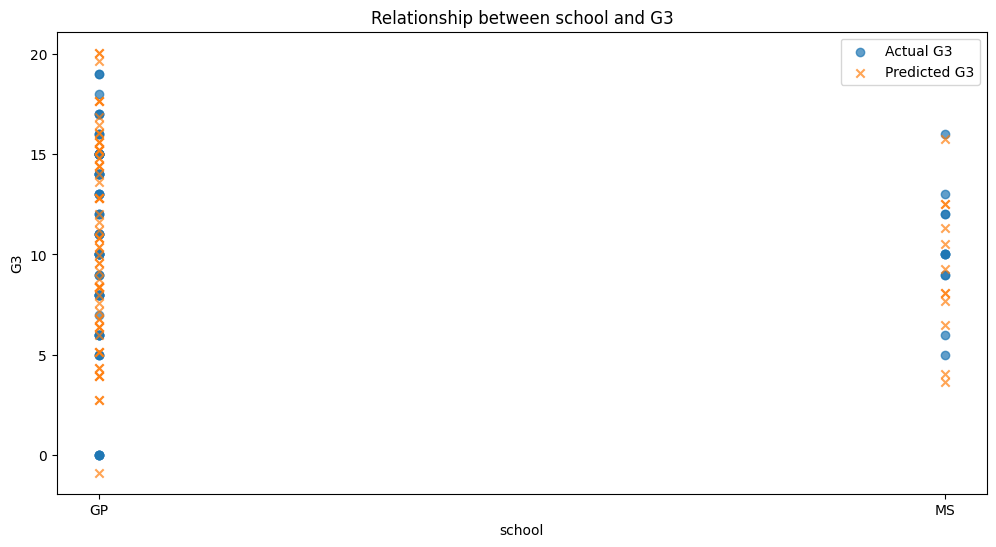

Mean Squared Error: 1.960817295343246


In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('student-mat.csv')

# Select relevant columns for analysis
data = df[['school', 'G1', 'G2', 'G3']]

# Calculate the mean of G1, G2, and G3 for each row using .loc
data = data.assign(mean_G=data[['G1', 'G2', 'G3']].mean(axis=1))

# One-hot encode 'school'
data = pd.get_dummies(data, columns=['school'], drop_first=True)

# Split the data into features (X) and target variable (y)
X = data[['mean_G', 'school_MS']]
y = data['G3']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

print(y_test.values.tolist())
print(y_pred)

# Create a DataFrame with the original 'school' and mean_G columns and predicted/actual G3 values
plot_data = pd.DataFrame({'school': df.loc[X_test.index, 'school'], 'Mean G': X_test['mean_G'], 'Actual G3': y_test.values, 'Predicted G3': y_pred})

# Plot the relationship between 'school' and G3
plt.figure(figsize=(12, 6))
plt.scatter(plot_data['school'], plot_data['Actual G3'], label='Actual G3', alpha=0.7)
plt.scatter(plot_data['school'], plot_data['Predicted G3'], label='Predicted G3', marker='x', alpha=0.7)
plt.xlabel('school')
plt.ylabel('G3')
plt.title('Relationship between school and G3')
plt.legend()
plt.show()


from sklearn.metrics import mean_squared_error
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

[10, 12, 5, 10, 9, 13, 18, 6, 0, 14, 15, 7, 15, 10, 14, 8, 8, 11, 15, 0, 14, 16, 16, 6, 0, 19, 11, 12, 17, 10, 8, 10, 15, 13, 8, 5, 0, 15, 14, 8, 5, 11, 14, 9, 15, 10, 11, 13, 13, 16, 13, 15, 12, 10, 6, 12, 11, 0, 16, 17, 14, 10, 10, 6, 9, 17, 8, 10, 9, 15, 6, 10, 15, 19, 12, 6, 9, 15, 5]
[ 7.986151   12.81103659  2.75919162  8.31941555  8.3882248  12.81103659
 19.64629116  6.37785581  3.89660377 12.81103659 15.22347938  5.90697276
 13.94844873 10.80066759 14.82140558  8.3882248   6.71112036 10.73185834
 15.95881772  5.10282516 14.35052253 16.02762697 15.55674393  4.29867757
  3.96541302 20.04836496 10.73185834  9.5944462  17.63592217 10.39859379
  7.5840772   7.91734175 15.55674393 12.74222734  6.30904656  3.96541302
 -0.92828182 15.22347938 12.81103659  6.71112036  5.10282516  9.52563695
 14.35052253  8.3882248  16.42970077  9.92771075 11.13393214 14.41933178
 12.00688899 16.83177457 13.54637493 15.15467013 10.39859379  8.31941555
  4.29867757 11.53600594 10.80066759  2.69038237 16.0

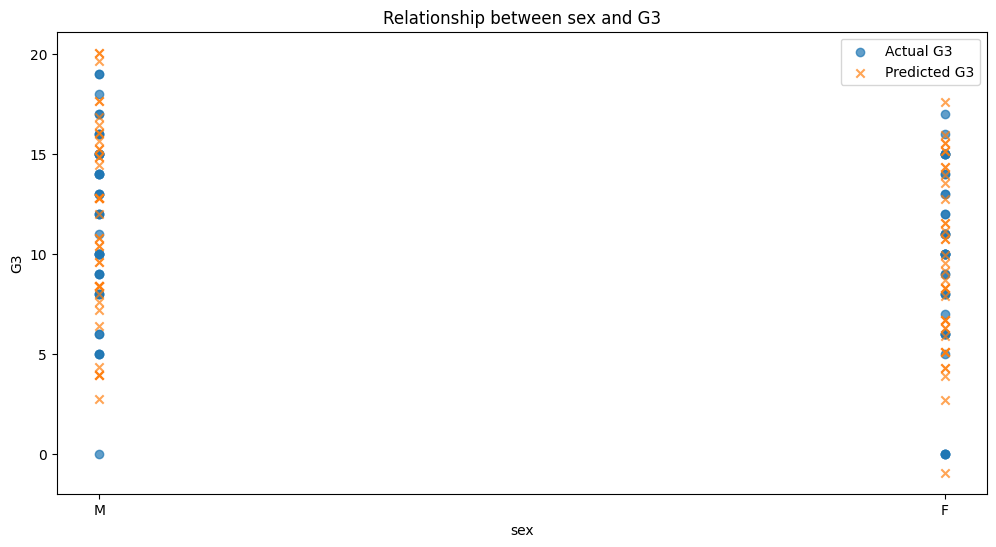

Mean Squared Error: 1.89852163939489


In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('student-mat.csv')

# Select relevant columns for analysis
data = df[['sex', 'G1', 'G2', 'G3']]

# Calculate the mean of G1, G2, and G3 for each row using .loc
data = data.assign(mean_G=data[['G1', 'G2', 'G3']].mean(axis=1))

# One-hot encode 'sex'
data = pd.get_dummies(data, columns=['sex'], drop_first=True)

# Split the data into features (X) and target variable (y)
X = data[['mean_G', 'sex_M']]
y = data['G3']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

print(y_test.values.tolist())
print(y_pred)

# Create a DataFrame with the original 'sex' and mean_G columns and predicted/actual G3 values
plot_data = pd.DataFrame({'sex': df.loc[X_test.index, 'sex'], 'Mean G': X_test['mean_G'], 'Actual G3': y_test.values, 'Predicted G3': y_pred})

# Plot the relationship between 'sex' and G3
plt.figure(figsize=(12, 6))
plt.scatter(plot_data['sex'], plot_data['Actual G3'], label='Actual G3', alpha=0.7)
plt.scatter(plot_data['sex'], plot_data['Predicted G3'], label='Predicted G3', marker='x', alpha=0.7)
plt.xlabel('sex')
plt.ylabel('G3')
plt.title('Relationship between sex and G3')
plt.legend()
plt.show()


from sklearn.metrics import mean_squared_error
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

[10, 12, 5, 10, 9, 13, 18, 6, 0, 14, 15, 7, 15, 10, 14, 8, 8, 11, 15, 0, 14, 16, 16, 6, 0, 19, 11, 12, 17, 10, 8, 10, 15, 13, 8, 5, 0, 15, 14, 8, 5, 11, 14, 9, 15, 10, 11, 13, 13, 16, 13, 15, 12, 10, 6, 12, 11, 0, 16, 17, 14, 10, 10, 6, 9, 17, 8, 10, 9, 15, 6, 10, 15, 19, 12, 6, 9, 15, 5]
[ 7.96500309 12.7173414   2.66571445  8.36706817  8.36706817 12.78978402
 19.62489035  6.35674278  3.94435231 12.78978402 15.20217449  5.88223507
 13.99597926 10.70701601 14.80010941  8.29462554  6.75880785 10.77945863
 16.00630465  5.07810492 14.39804433 16.00630465 15.60423957  4.34641739
  3.94435231 20.02695542 10.77945863  9.5732634  17.61456496 10.37739355
  7.56293801  7.89256046 15.60423957 12.7173414   6.35674278  3.87190968
 -0.88042863 15.20217449 12.78978402  6.75880785  5.07810492  9.5732634
 14.39804433  8.36706817 16.3359271   9.97532848 11.18152371 14.39804433
 11.91321124 16.8104348  13.52147155 15.20217449 10.37739355  8.29462554
  4.27397476 11.58358879 10.77945863  2.73815708 16.00

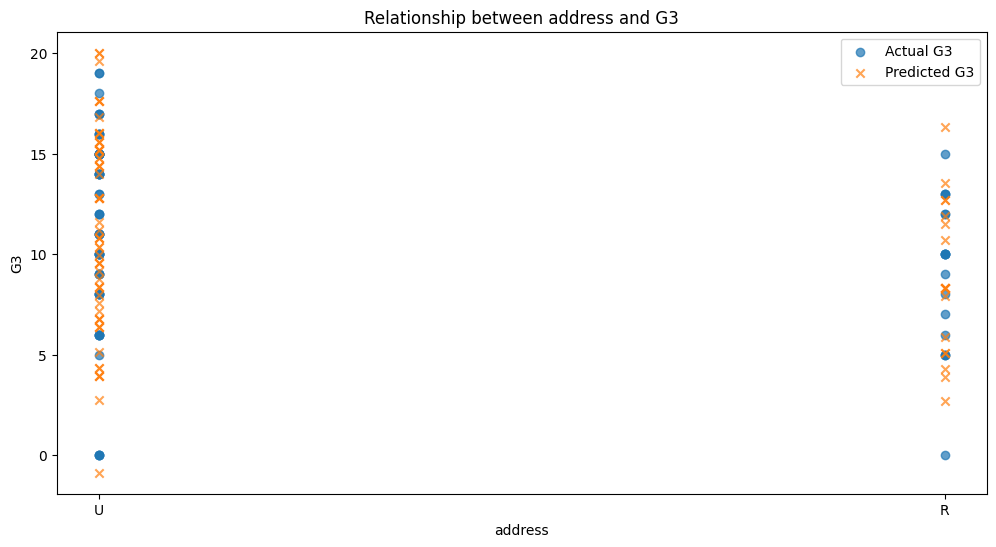

Mean Squared Error: 1.9024835259848871


In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('student-mat.csv')

# Select relevant columns for analysis
data = df[['address', 'G1', 'G2', 'G3']]

# Calculate the mean of G1, G2, and G3 for each row using .loc
data = data.assign(mean_G=data[['G1', 'G2', 'G3']].mean(axis=1))

# One-hot encode 'address'
data = pd.get_dummies(data, columns=['address'], drop_first=True)

# Split the data into features (X) and target variable (y)
X = data[['mean_G', 'address_U']]
y = data['G3']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

print(y_test.values.tolist())
print(y_pred)

# Create a DataFrame with the original 'address' and mean_G columns and predicted/actual G3 values
plot_data = pd.DataFrame({'address': df.loc[X_test.index, 'address'], 'Mean G': X_test['mean_G'], 'Actual G3': y_test.values, 'Predicted G3': y_pred})

# Plot the relationship between 'address' and G3
plt.figure(figsize=(12, 6))
plt.scatter(plot_data['address'], plot_data['Actual G3'], label='Actual G3', alpha=0.7)
plt.scatter(plot_data['address'], plot_data['Predicted G3'], label='Predicted G3', marker='x', alpha=0.7)
plt.xlabel('address')
plt.ylabel('G3')
plt.title('Relationship between address and G3')
plt.legend()
plt.show()


from sklearn.metrics import mean_squared_error
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

[10, 12, 5, 10, 9, 13, 18, 6, 0, 14, 15, 7, 15, 10, 14, 8, 8, 11, 15, 0, 14, 16, 16, 6, 0, 19, 11, 12, 17, 10, 8, 10, 15, 13, 8, 5, 0, 15, 14, 8, 5, 11, 14, 9, 15, 10, 11, 13, 13, 16, 13, 15, 12, 10, 6, 12, 11, 0, 16, 17, 14, 10, 10, 6, 9, 17, 8, 10, 9, 15, 6, 10, 15, 19, 12, 6, 9, 15, 5]
[ 7.96043939 12.74241836  2.68140804  8.3628798   8.31557382 12.78972435
 19.63121136  6.30337175  3.93603526 12.78972435 15.20436682  5.94823733
 13.99704558 10.73021629 14.80192641  8.3628798   6.75311815 10.73021629
 15.96194166  5.1433565  14.399486   15.96194166 15.60680723  4.33847568
  3.93603526 19.98634579 10.77752228  9.52289505 17.6190093  10.37508187
  7.55799898  7.96043939 15.60680723 12.78972435  6.35067774  3.93603526
 -0.89324969 15.20436682 12.78972435  6.75311815  5.1433565   9.57020104
 14.399486    8.31557382 16.41168806  9.97264146 11.13265671 14.399486
 11.98484352 16.81412847 13.59460517 15.20436682 10.37508187  8.31557382
  4.33847568 11.53509712 10.77752228  2.72871403 15.961

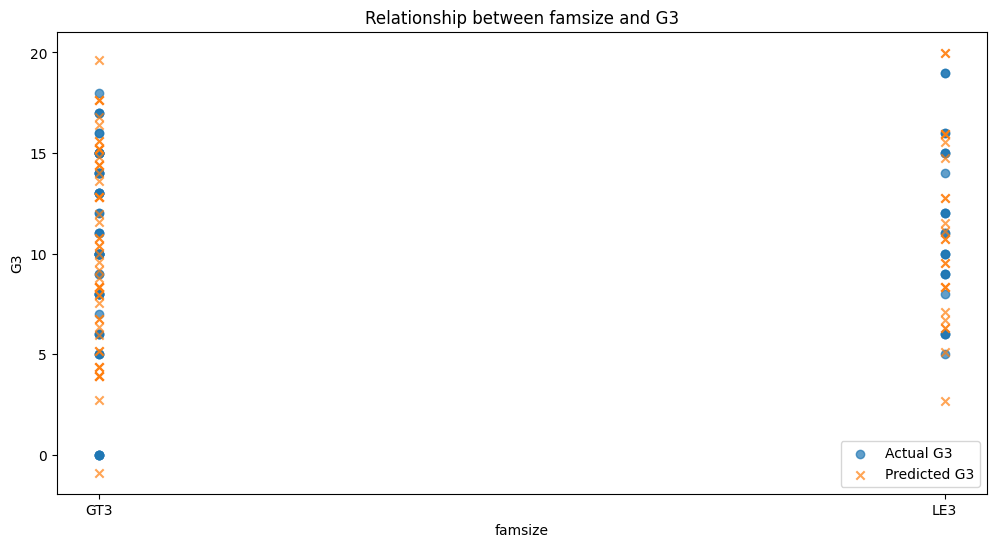

Mean Squared Error: 1.9038379002082786


In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('student-mat.csv')

# Select relevant columns for analysis
data = df[['famsize', 'G1', 'G2', 'G3']]

# Calculate the mean of G1, G2, and G3 for each row using .loc
data = data.assign(mean_G=data[['G1', 'G2', 'G3']].mean(axis=1))

# One-hot encode 'famsize'
data = pd.get_dummies(data, columns=['famsize'], drop_first=True)

# Split the data into features (X) and target variable (y)
X = data[['mean_G', 'famsize_LE3']]
y = data['G3']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

print(y_test.values.tolist())
print(y_pred)

# Create a DataFrame with the original 'famsize' and mean_G columns and predicted/actual G3 values
plot_data = pd.DataFrame({'famsize': df.loc[X_test.index, 'famsize'], 'Mean G': X_test['mean_G'], 'Actual G3': y_test.values, 'Predicted G3': y_pred})

# Plot the relationship between 'famsize' and G3
plt.figure(figsize=(12, 6))
plt.scatter(plot_data['famsize'], plot_data['Actual G3'], label='Actual G3', alpha=0.7)
plt.scatter(plot_data['famsize'], plot_data['Predicted G3'], label='Predicted G3', marker='x', alpha=0.7)
plt.xlabel('famsize')
plt.ylabel('G3')
plt.title('Relationship between famsize and G3')
plt.legend()
plt.show()


from sklearn.metrics import mean_squared_error
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

[10, 12, 5, 10, 9, 13, 18, 6, 0, 14, 15, 7, 15, 10, 14, 8, 8, 11, 15, 0, 14, 16, 16, 6, 0, 19, 11, 12, 17, 10, 8, 10, 15, 13, 8, 5, 0, 15, 14, 8, 5, 11, 14, 9, 15, 10, 11, 13, 13, 16, 13, 15, 12, 10, 6, 12, 11, 0, 16, 17, 14, 10, 10, 6, 9, 17, 8, 10, 9, 15, 6, 10, 15, 19, 12, 6, 9, 15, 5]
[ 7.92173646 12.80150676  2.68810861  8.32432322  8.47051086 12.94769441
 19.59675242  6.31138943  3.89586889 12.75277755 15.16829809  5.90880267
 14.00926704 10.83730219 14.76571133  8.32432322  6.71397619 10.73984376
 16.02220082  5.10362916 14.36312458 16.07093004 15.57088485  4.29845564
  3.89586889 19.99933918 10.73984376  9.53208349 17.58381864 10.337257
  7.5191497   7.92173646 15.57088485 12.75277755  6.31138943  4.04205653
 -0.9351722  15.16829809 12.80150676  6.71397619  5.15235837  9.53208349
 14.36312458  8.37305243 16.37605836  9.93467025 11.14243052 14.36312458
 12.04506247 16.77864512 13.55795106 15.16829809 10.43471544  8.42178165
  4.34718486 11.54501728 10.73984376  2.68810861 15.973

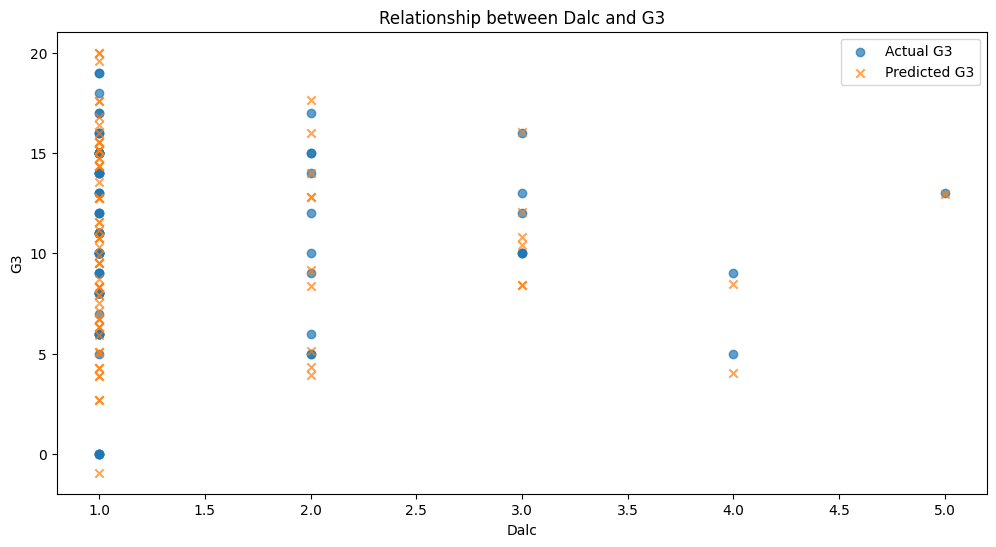

Mean Squared Error: 1.885461909668013


In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('student-mat.csv')

# Select relevant columns for analysis
data = df[['Dalc', 'G1', 'G2', 'G3']]

# Calculate the mean of G1, G2, and G3 for each row using .loc
data = data.assign(mean_G=data[['G1', 'G2', 'G3']].mean(axis=1))

# Split the data into features (X) and target variable (y)
X = data[['mean_G', 'Dalc']]
y = data['G3']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

print(y_test.values.tolist())
print(y_pred)

# Create a DataFrame with the original 'Dalc' column and predicted/actual 'G3' values
plot_data = pd.DataFrame({'Dalc': df.loc[X_test.index, 'Dalc'], 'Actual G3': y_test.values, 'Predicted G3': y_pred})

# Plot the relationship between 'Dalc' and G3
plt.figure(figsize=(12, 6))
plt.scatter(plot_data['Dalc'], plot_data['Actual G3'], label='Actual G3', alpha=0.7)
plt.scatter(plot_data['Dalc'], plot_data['Predicted G3'], label='Predicted G3', marker='x', alpha=0.7)
plt.xlabel('Dalc')
plt.ylabel('G3')
plt.title('Relationship between Dalc and G3')
plt.legend()
plt.show()


from sklearn.metrics import mean_squared_error
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

[10, 12, 5, 10, 9, 13, 18, 6, 0, 14, 15, 7, 15, 10, 14, 8, 8, 11, 15, 0, 14, 16, 16, 6, 0, 19, 11, 12, 17, 10, 8, 10, 15, 13, 8, 5, 0, 15, 14, 8, 5, 11, 14, 9, 15, 10, 11, 13, 13, 16, 13, 15, 12, 10, 6, 12, 11, 0, 16, 17, 14, 10, 10, 6, 9, 17, 8, 10, 9, 15, 6, 10, 15, 19, 12, 6, 9, 15, 5]
[ 7.81219918 12.84458016  2.76261904  8.21547762  8.60155691 13.03761981
 19.50727408  6.1990854   3.87593455 12.65154052 15.07121119  5.79580696
 14.0544155  10.92470776 14.76445256  8.21547762  6.60236385 10.63514829
 16.07080772  4.98925007 14.36117412 16.16732754 15.47448963  4.18269318
  3.77941473 19.91055252 10.82818794  9.42531296 17.49088185 10.23186985
  7.40892073  7.908719   15.57100945 12.74806034  6.39212504  3.97245438
 -1.05992661 15.07121119 12.74806034  6.79540349  5.27880953  9.52183278
 14.36117412  8.31199745 16.37756634  9.8285914  11.3279862  14.2646543
 12.23106292 16.78084479 13.45809741 15.07121119 10.52142931  8.50503709
  4.279213   11.63474483 10.73166812  2.5695794  16.07

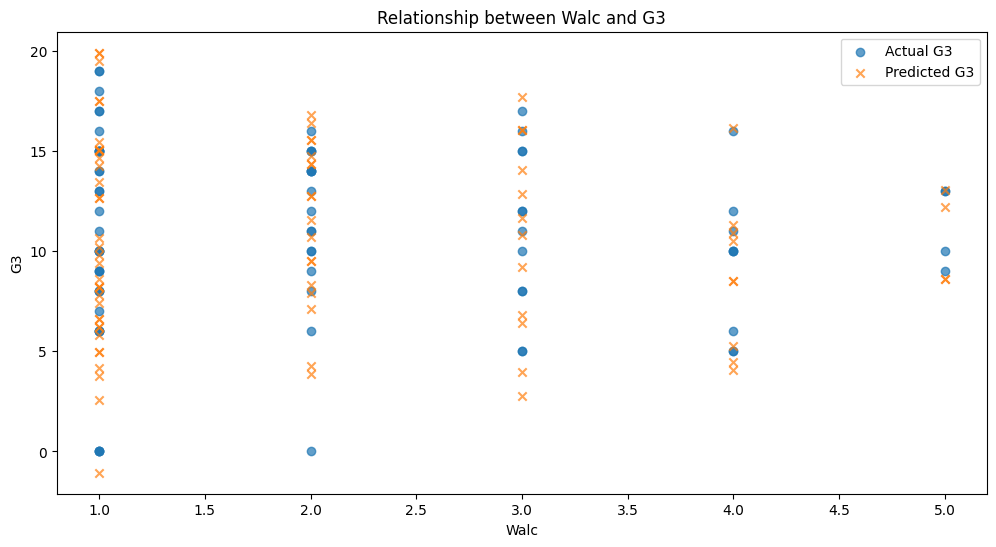

Mean Squared Error: 1.8532086848783733


In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('student-mat.csv')

# Select relevant columns for analysis
data = df[['Walc', 'G1', 'G2', 'G3']]

# Calculate the mean of G1, G2, and G3 for each row using .loc
data = data.assign(mean_G=data[['G1', 'G2', 'G3']].mean(axis=1))

# Split the data into features (X) and target variable (y)
X = data[['mean_G', 'Walc']]
y = data['G3']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

print(y_test.values.tolist())
print(y_pred)

# Create a DataFrame with the original 'Walc' column and predicted/actual 'G3' values
plot_data = pd.DataFrame({'Walc': df.loc[X_test.index, 'Walc'], 'Actual G3': y_test.values, 'Predicted G3': y_pred})

# Plot the relationship between 'Walc' and G3
plt.figure(figsize=(12, 6))
plt.scatter(plot_data['Walc'], plot_data['Actual G3'], label='Actual G3', alpha=0.7)
plt.scatter(plot_data['Walc'], plot_data['Predicted G3'], label='Predicted G3', marker='x', alpha=0.7)
plt.xlabel('Walc')
plt.ylabel('G3')
plt.title('Relationship between Walc and G3')
plt.legend()
plt.show()


from sklearn.metrics import mean_squared_error
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

[10, 12, 5, 10, 9, 13, 18, 6, 0, 14, 15, 7, 15, 10, 14, 8, 8, 11, 15, 0, 14, 16, 16, 6, 0, 19, 11, 12, 17, 10, 8, 10, 15, 13, 8, 5, 0, 15, 14, 8, 5, 11, 14, 9, 15, 10, 11, 13, 13, 16, 13, 15, 12, 10, 6, 12, 11, 0, 16, 17, 14, 10, 10, 6, 9, 17, 8, 10, 9, 15, 6, 10, 15, 19, 12, 6, 9, 15, 5]
[ 7.92597957 12.75816398  2.76648405  8.29097615  8.36634707 12.79584944
 19.67912948  6.39062236  3.82378832 12.72047852 15.2496271   5.95025486
 14.041581   10.82012473 14.80925961  8.25329069  6.79330439 10.74475381
 15.94193479  5.14489079 14.33120666 15.94193479 15.57693822  4.30184127
  3.89915923 20.00644059 10.74475381  9.49902225 17.62803385 10.26670086
  7.560983    7.96366503 15.57693822 12.8335349   6.3529369   3.89915923
 -0.85765426 15.2496271  12.8335349   6.79330439  5.18257625  9.61207863
 14.40657758  8.29097615 16.38230229  9.86401883 11.14743585 14.36889212
 11.877429   16.86035524 13.52584259 15.09888527 10.4174427   8.29097615
  4.37721219 11.6254888  10.78243927  2.72879859 16.0

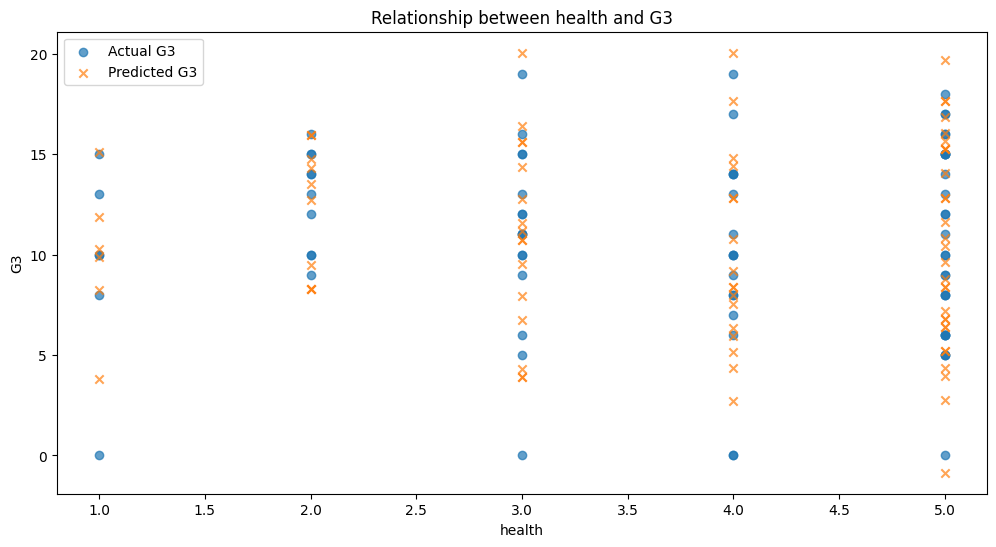

Mean Squared Error: 1.8841119292102761


In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('student-mat.csv')

# Select relevant columns for analysis
data = df[['health', 'G1', 'G2', 'G3']]

# Calculate the mean of G1, G2, and G3 for each row using .loc
data = data.assign(mean_G=data[['G1', 'G2', 'G3']].mean(axis=1))

# Split the data into features (X) and target variable (y)
X = data[['mean_G', 'health']]
y = data['G3']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

print(y_test.values.tolist())
print(y_pred)

# Create a DataFrame with the original 'health' column and predicted/actual 'G3' values
plot_data = pd.DataFrame({'health': df.loc[X_test.index, 'health'], 'Actual G3': y_test.values, 'Predicted G3': y_pred})

# Plot the relationship between 'health' and G3
plt.figure(figsize=(12, 6))
plt.scatter(plot_data['health'], plot_data['Actual G3'], label='Actual G3', alpha=0.7)
plt.scatter(plot_data['health'], plot_data['Predicted G3'], label='Predicted G3', marker='x', alpha=0.7)
plt.xlabel('health')
plt.ylabel('G3')
plt.title('Relationship between health and G3')
plt.legend()
plt.show()


from sklearn.metrics import mean_squared_error
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

[10, 12, 5, 10, 9, 13, 18, 6, 0, 14, 15, 7, 15, 10, 14, 8, 8, 11, 15, 0, 14, 16, 16, 6, 0, 19, 11, 12, 17, 10, 8, 10, 15, 13, 8, 5, 0, 15, 14, 8, 5, 11, 14, 9, 15, 10, 11, 13, 13, 16, 13, 15, 12, 10, 6, 12, 11, 0, 16, 17, 14, 10, 10, 6, 9, 17, 8, 10, 9, 15, 6, 10, 15, 19, 12, 6, 9, 15, 5]
[ 7.8606442  12.70599642  2.77426465  8.40036937  8.46929964 12.63706615
 19.51471825  6.62081383  3.79604446 12.68301967 15.04825388  5.94322812
 13.86563677 10.62774304 14.83020332  8.26250882  6.60909681 10.67369655
 15.85198313  5.00163832 14.33643167 15.9209134  15.45011851  4.33576963
  3.79604446 20.10039693 10.62774304  9.42214917 17.45944162 10.40969248
  8.28594286  7.8606442  15.45011851 12.72897318  6.20723219  4.11771907
 -1.02633101 15.14016092 12.68301967  6.93077142  5.04759184  9.42214917
 14.33643167  8.40036937 16.29980127  9.82401379 11.30532875 14.7040598
 11.97119745 16.74761941 13.62460946 15.04825388 10.22587842  8.30846233
  4.35874638 11.70719338 10.67369655  2.59045059 15.89

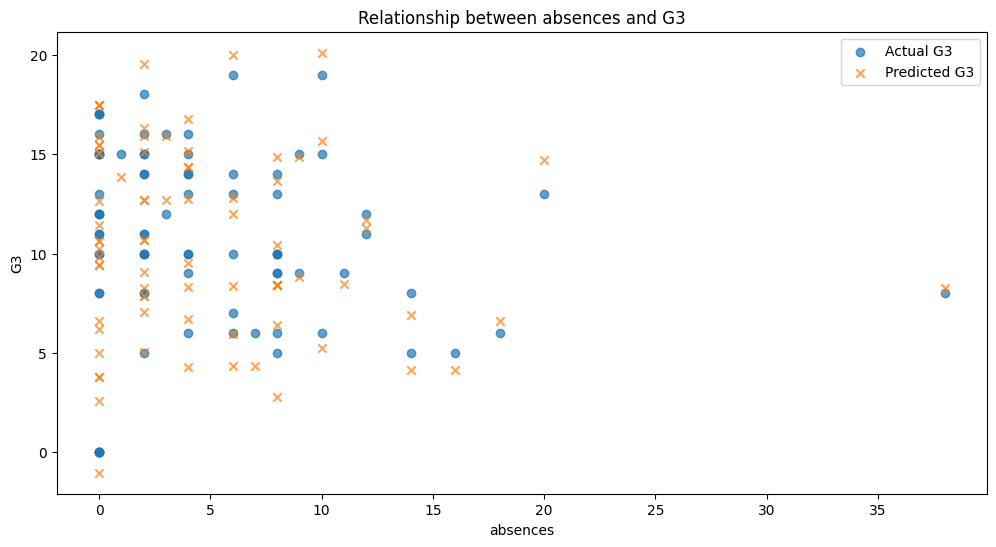

Mean Squared Error: 1.8783656655403718


In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('student-mat.csv')

# Select relevant columns for analysis
data = df[['absences', 'G1', 'G2', 'G3']]

# Calculate the mean of G1, G2, and G3 for each row using .loc
data = data.assign(mean_G=data[['G1', 'G2', 'G3']].mean(axis=1))

# Split the data into features (X) and target variable (y)
X = data[['mean_G', 'absences']]
y = data['G3']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

print(y_test.values.tolist())
print(y_pred)

# Create a DataFrame with the original 'absences' column and predicted/actual 'G3' values
plot_data = pd.DataFrame({'absences': df.loc[X_test.index, 'absences'], 'Actual G3': y_test.values, 'Predicted G3': y_pred})

# Plot the relationship between 'absences' and G3
plt.figure(figsize=(12, 6))
plt.scatter(plot_data['absences'], plot_data['Actual G3'], label='Actual G3', alpha=0.7)
plt.scatter(plot_data['absences'], plot_data['Predicted G3'], label='Predicted G3', marker='x', alpha=0.7)
plt.xlabel('absences')
plt.ylabel('G3')
plt.title('Relationship between absences and G3')
plt.legend()
plt.show()


from sklearn.metrics import mean_squared_error
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# New Section